# Алгоритмы анализа данных

### Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

Коментарий из нескольких строк, комбинация клавиш - "^/"

## <center> Практическое задание </center>

__1.__ Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

__2.__ Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

__3. [опция].__ Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

### 1. Задача:

- Сгенерировать датасет при помощи sklearn.datasets.make_regression;
- Обучить линейную модель при помощи градиентного и стохастического градиентного спуска;
- Нанести среднеквадратичную ошибку для обоих методов на один график;
- Cделать выводы о разнице скорости сходимости каждого из методов.

#### 1.1 Сгенерировать датасет при помощи sklearn.datasets.make_regression;
- Как создать наборы тестовых данных в Python с помощью scikit-learn - https://www.machinelearningmastery.ru/generate-test-datasets-python-scikit-learn/

In [2]:
n = 1000  # размерность
n_features = 1  # Количество параметров
 
# generate 2d classification dataset
# X_1, y_1 = make_regression(n_samples = n, n_features=1,n_informative=1, bias = 150.0, noise = 15, random_state=0)
# X, y = make_regression(n_samples=n, n_features=1, noise=15)

# X, y = make_regression(n_samples = n, n_features = 1, bias = 0.0, noise = 15, random_state=10)

X, y, coef = datasets.make_regression(n_samples = n, 
                                              n_features = n_features, #bias = 0.0,
                                              n_targets = 1,
                                              noise = 15, 
                                              coef = True, 
                                              random_state=10)

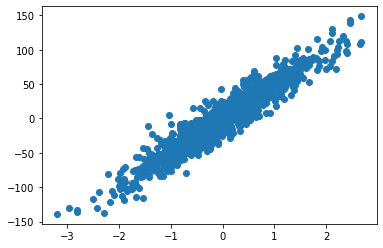

In [3]:
# plot regression dataset
plt.scatter(X,y)
plt.show()

In [4]:
# X, y
X.shape, y.shape

((1000, 1), (1000,))

Отмасштабируем получившиеся признаки методом нормализации.

In [5]:
X_min = X.min()
X_max = X.max()

X_min, X_max, X.shape

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
# for i in range(X.shape[0]):
#     for j in range(X.shape[1]):
#         X[i][j] = (X[i][j] - X_min)/(X_max - X_min)

(-3.2044013443296304, 2.6799103079793154, (1000, 1))

Отмасштабируем получившиеся признаки методом стандартизации.

In [6]:
# коментарий из нескольких строк комбинация клавиш - "^/"

# Получим средние значения и стандартное отклонение по столбцам
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)
 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j])/stds[j]
        
means, stds, X.min(), X.max()

(array([-0.01455664]),
 array([0.93795776]),
 -3.4008404794792084,
 2.872695409705256)

In [7]:
# 100 NumPy задач - https://pythonworld.ru/numpy/100-exercises.html
# Z = np.zeros(n)
# Z = np.zeros( (n, 1) )
# Z = np.full(n, 2.5)
# Z[4] = 1

In [8]:
# Создать вектор размера n, заполненный единицами
Z = np.ones(n)
Z = np.ones( (n, 1) )

# Z, type(Z)

In [9]:
# Создать матрицу параметров
x = np.hstack((Z,X)).T
x, x.shape# , y
x.min(), x.max()

(-3.4008404794792084, 2.872695409705256)

No handles with labels found to put in legend.


(-3.4008404794792084, 2.872695409705256)

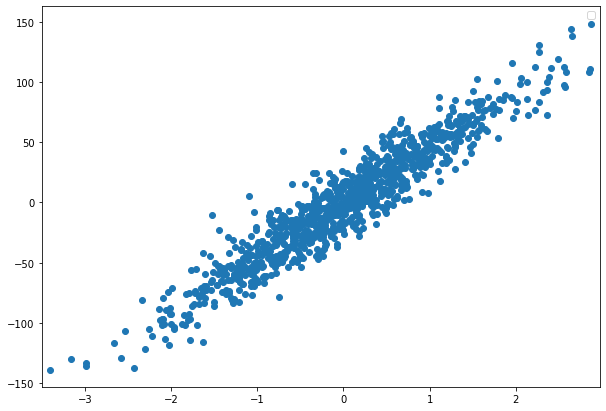

In [10]:
a = 75
b = 10
fig = plt.figure(figsize=(10, 7))
plt.scatter(x[1, :], y, alpha=1)
# y = a*x + b #
#plt.plot(x[1, :], a*x[1, :]  + b,  "r--", linewidth=1, label=f"{b} + {a}x")
plt.xlim(x.min() - 0.1, x.max() + 0.1)
plt.legend(loc='best')

x.min(), x.max()

# x[1, :], y

In [11]:
#s=np.ones(n)
#type(s), s, np.append(X, Z, axis=0)

In [12]:
# b = np.vstack((X, np.zeros((X.shape[0], 1), dtype=X.dtype)))
# b = np.hstack((X, np.ones((X.shape[0], 1), dtype=X.dtype)))
# X, b

In [13]:
#https://coderoad.ru/27513246/объединение-векторов-в-виде-матрицы-столбцов-в-numpy
# a = np.ones(2)
# b = np.zeros(2)
# c = np.ones(2)
# n1 = np.vstack((a,b))
# n2 = np.vstack((n1,c)).T
#a, b, c, n1, n2

#### 1.2 Обучить линейную модель при помощи градиентного и стохастического градиентного спуска

In [14]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

##### Gradient Descent (Градиентный спуск)

In [15]:
x, x.shape  # размер нашего датасета

(array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 0.15000836,  0.52811054,  0.04686504, ..., -0.30004253,
          0.91767644, -0.29695613]]),
 (2, 1000))

In [16]:
n = x.shape[1]
n

1000

In [17]:
# Базисные значения:
W_norm = np.linalg.inv(np.dot(x, x.T)) @ x @ y
y_pred = W_norm @ x  # вычисляем вектор прогнозов
err = calc_mse(y, y_pred)  # вычисляем ошибку
W_norm, err

(array([-0.46053697, 45.30207724]), 216.9477446337499)

In [18]:
# скорость обучения (базовый шаг alpha) 
# alpha = 1e-02
alpha = 1e-01

In [19]:
# задаём начальный вектор весов
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.1)

In [20]:
W.shape, 
y_pred = W @ x

In [21]:
# задаём массив количества шагов
# k_array = np.array([1500, 5000, 10000])
k_array = np.array([10000])
#for k in range(len(k_array)):
#    print(f'\nk={k}, k_array={k_array[k]}\n')

In [22]:
# список значений ошибок после каждой итерации
errors_gd = []

# k - число итераций
k_array = np.array([5000])
for k in k_array:
    W = np.array([1, 0.5])
    print(f'\nk={k}, k_array={k}\n')
    for i in range(k):
        y_pred = W @ x  # вычисляем вектор прогнозов
        err = calc_mse(y, y_pred)  # вычисляем ошибку
        errors_gd.append(calc_mse(y, y_pred))
        # в цикле по вектору весов, вычисляем новые веса (Формула вычисления градиента)
        for ii in range(W.shape[0]):
            # W[ii] = W[ii] - alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
            # W[ii] - веса на предыдущей итерации
            # alpha - скорость обучения
            # (1 / n * 2 * np.sum(X[ii] * (y_pred - y))) - градиент функции потерь
            W[ii] -= alpha * (1 / n * 2 * np.sum(x[ii] * (y_pred - y)))
        if i % 500 == 0:
            print(i, W, err, k, alpha)  # i - итерация, W - вектор весов, err -значение ошибки


k=5000, k_array=5000

0 [0.70789261 9.46041545] 2226.307037900639 5000 0.1
500 [-0.46053697 45.30207724] 216.9477446337499 5000 0.1
1000 [-0.46053697 45.30207724] 216.9477446337499 5000 0.1
1500 [-0.46053697 45.30207724] 216.9477446337499 5000 0.1
2000 [-0.46053697 45.30207724] 216.9477446337499 5000 0.1
2500 [-0.46053697 45.30207724] 216.9477446337499 5000 0.1
3000 [-0.46053697 45.30207724] 216.9477446337499 5000 0.1
3500 [-0.46053697 45.30207724] 216.9477446337499 5000 0.1
4000 [-0.46053697 45.30207724] 216.9477446337499 5000 0.1
4500 [-0.46053697 45.30207724] 216.9477446337499 5000 0.1


In [23]:
print(f'Вектор весов: {W}\nMSE: {err}')

Вектор весов: [-0.46053697 45.30207724]
MSE: 216.9477446337499


In [24]:
type(errors_gd)

list

Text(0, 0.5, 'MSE')

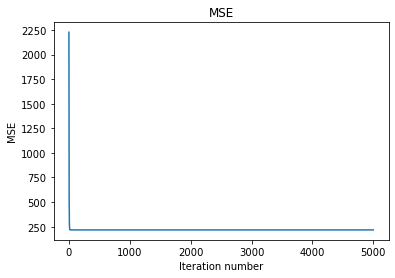

In [25]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_gd)), errors_gd, label=f"mse={err}")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

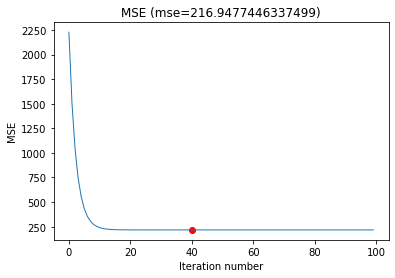

In [26]:
# Детализация визуализируем изменение функционала ошибки
plt.plot(range(len(errors_gd[:100])), errors_gd[:100], linewidth=1, label=f"mse={err}")
plt.scatter(40, err, c='r')
plt.title(f'MSE (mse={err})')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

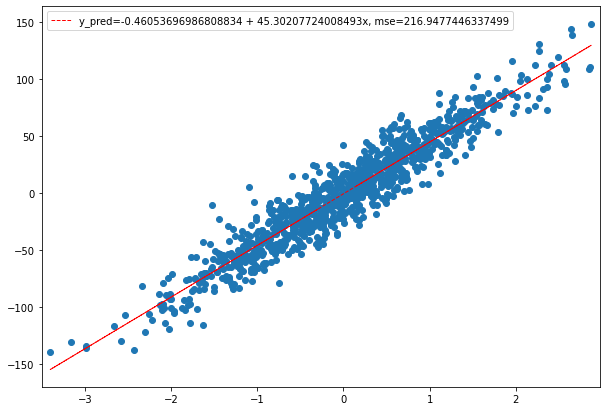

In [27]:
# Построим график найденного значения
# 𝛼=0.1 k=10000: вектор весов 𝑊 = [-154.52567505  284.20420742], ошибка mse=216.94774463374992

fig = plt.figure(figsize=(10, 7))
plt.scatter(x[1, :], y, alpha=1)
# y = a*x + b #
plt.plot(x[1, :], W[1]*x[1, :] + W[0],  "r--", linewidth=1, label=f"y_pred={W[0]} + { W[1]}x, mse={err}")
plt.xlim(x.min() - 0.1, x.max() + 0.1)
plt.legend(loc='best')

##### SGD - Stochastic gradient descent (Стохастический градиентный спуск)

In [28]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
# сгенерируем набор данных
# n_features = 2
# data, target, coef = datasets.make_regression(n_samples=10000, 
#                                               n_features = n_features,
#                                               n_informative = 2,
#                                               n_targets = 1, 
#                                               noise = 5, 
#                                               coef = True, 
#                                               random_state = 10)

In [30]:
# n_features = 1
# data, target, coef = datasets.make_regression(n_samples = n, 
#                                               n_features = n_features, #bias = 0.0,
#                                               n_informative = 1,
#                                               n_targets = 1,
#                                               noise = 15, 
#                                               coef = True, 
#                                               random_state=10)
data, target, coef = X, y ,coef

In [31]:
 coef# , data, target 

array(47.37198629)

Отмасштабируем получившиеся признаки методом стандартизации.

In [32]:
# Масштабирование признаков - стандартизация
def standart_data(data):
    # Получим средние значения и стандартное отклонение по столбцам
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    
    # параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
    #(см. документацию в разделе источников)

    # вычтем каждое значение признака из среднего и поделим на стандартное отклонение
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            data[i][j] = (data[i][j] - means[j])/stds[j]

In [33]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [34]:
def plot_graf():
    # Построим графики найденных значений
    fig = plt.figure(figsize=(15, 10))
    plt.scatter(data, target, alpha=1)

    # Стохастический градиентный спуск
    #plt.plot(data, coef*data,  "r--", linewidth=4, label=f"y_sgd={coef}x, mse={round(errors[-1], 4)}")
    #plt.plot(data, coef*data,  "g--", linewidth=1, label=f"y_sgd={coef}x, mse={errors[-1]}")
    plt.plot(data, w_list[-1]*data,  "r--", linewidth=1, label=f"y_sgd={w_list[-1]}x, mse={errors[-1]}")

    # Градиентный спуск
    # 𝛼=0.1 k=10000: вектор весов 𝑊 = [-154.52567505  284.20420742], ошибка mse=216.94774463374992
    plt.plot(x[1, :], W[1]*x[1, :] + W[0],  "b--", linewidth=1, label=f"y_gd={W[0]} + { W[1]}x, mse={err}") 

    # plt.xlim(x.min() - 0.1, x.max() + 0.1)
    plt.legend(loc='best')
    print(errors[-1], w_list[-1], len(errors))

Подготовка данных и средств проверки закончена. Далее реализуем сам стохастический градиентный спуск.

In [35]:
# Подготовка данных

# инициализируем начальный вектор весов
w = np.zeros(n_features)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.5

# максимальное число итераций
max_iter = 1e5
# max_iter = 1e4
# max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

#np.random.seed(1234)
np.random.seed(234)

# Масштабирование признаков - стандартизация
standart_data(data)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:

    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    #errors.append(calc_mse(target, data*new_w))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 217.1906


In [36]:
# train_ind = np.random.randint(data.shape[0])
# data.shape[0], train_ind, data[train_ind], data[train_ind].T

217.19059867932847 [45.4774618] 100000


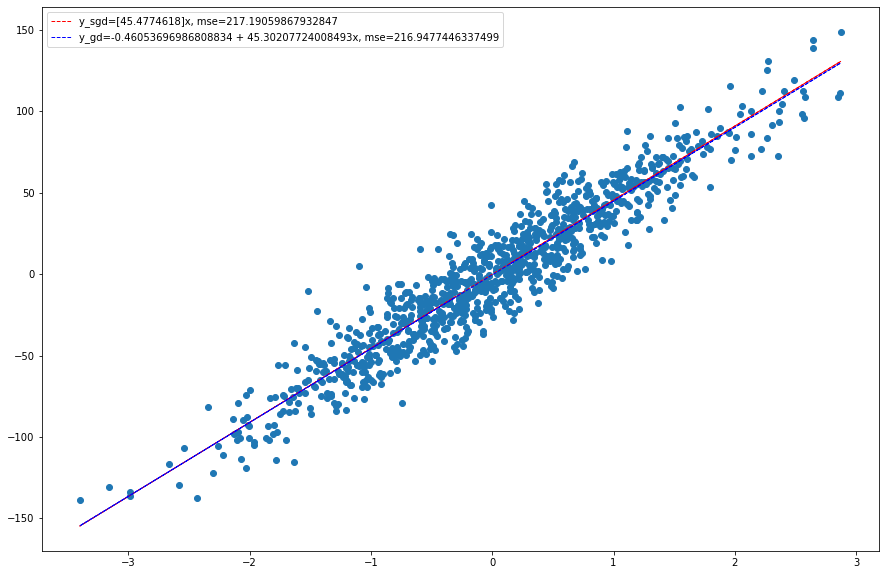

In [37]:
# Построим графики найденных значений
plot_graf()

In [38]:
#coef 
w_list,
w_list[:, 0]

array([ 0.        ,  0.12786475,  0.42437875, ..., 45.45671689,
       45.47754343, 45.4774618 ])

In [39]:
# # Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
# plt.figure(figsize=(13, 6))
# plt.title('Stochastic gradient descent')
# plt.xlabel(r'$w_1$')
# plt.ylabel(r'$w_2$')

# plt.scatter(w_list[:, 0], w_list[:, 1])
# plt.scatter(coef[0], coef[1], c='r')

# plt.show()

#### 1.3 Нанести среднеквадратичную ошибку для обоих методов на один график

In [40]:
type(errors)
len(errors)

100000

###### Стохастический градиентный спуск - GD

Text(0, 0.5, 'MSE')

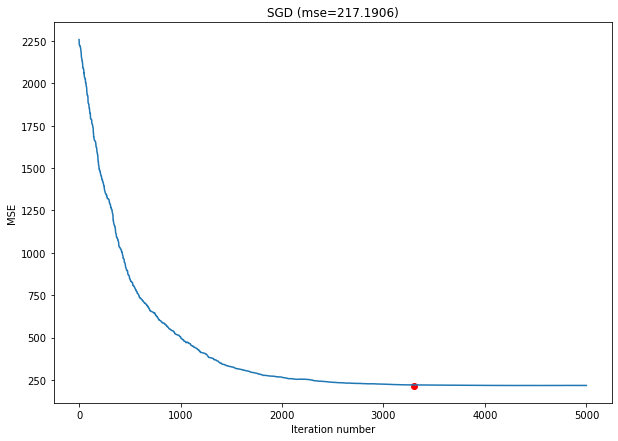

In [41]:
# Визуализируем изменение функционала ошибки (Стохастический градиентный спуск - GD)
fig = plt.figure(figsize=(10, 7))
# plt.plot(range(len(errors)), errors, label="SGD")  # Стохастический градиентный спуск
plt.plot(range(len(errors[:5000])), errors[:5000], label="SGD")  # Стохастический градиентный спуск
plt.scatter(3300, errors[-1], c='r')
plt.title('SGD (mse=217.1906)')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

##### Градиентный спуск - GD

Text(0, 0.5, 'MSE')

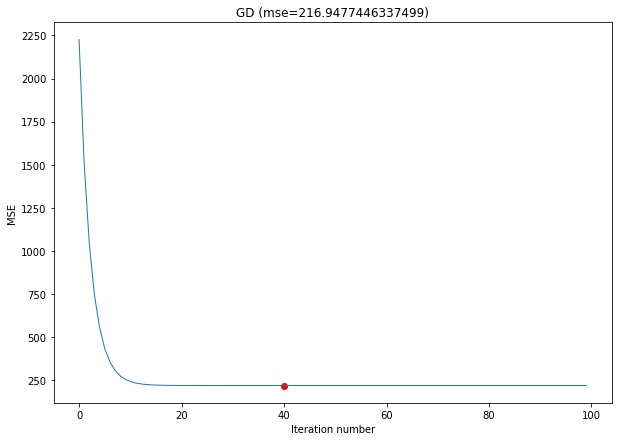

In [42]:
# Детализация изменение функционала ошибки (Градиентный спуск - GD)
fig = plt.figure(figsize=(10, 7))
plt.plot(range(len(errors_gd[:100])), errors_gd[:100], linewidth=1, label=f"mse={err}")
plt.scatter(40, err, c='r')
plt.title(f'GD (mse={err})')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

##### GD и SGD на одном графике

Text(0, 0.5, 'MSE')

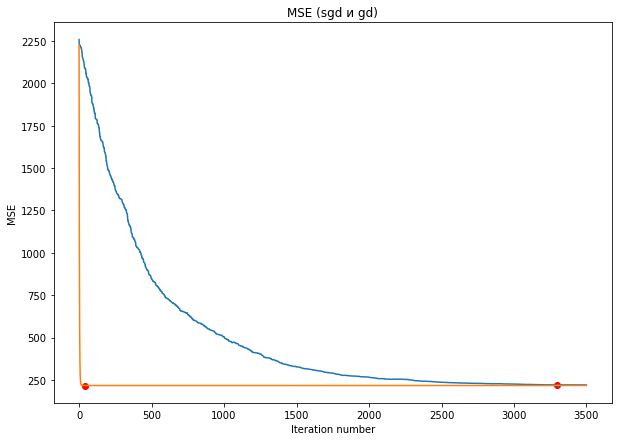

In [43]:
# Визуализируем изменение функционала ошибки
fig = plt.figure(figsize=(10, 7))
plt.plot(range(len(errors[:3500])), errors[:3500], label="SGD")  # Стохастический градиентный спуск
plt.plot(range(len(errors_gd[:3500])), errors_gd[:3500], label="GD")  # Градиентный спуск
plt.scatter(40, err, c='r')
plt.scatter(3300, errors[-1], c='r')
plt.title('MSE (sgd и gd)')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

#### 1.4 Cделать выводы о разнице скорости сходимости каждого из методов

__Вывод:__

__Базовые значения__:
- Вектор весов W = [-0.46053697, 45.30207724]
- Ошибка MSE = 216.9477446337499

___Градиентный спуск - GD___:

_Параметры модели_:<br />
- $y_{pred}=-0.46053697 + 45.30207724*x$
- Вектор весов W = [-0.46053697 45.30207724]<br />
- Ошибка MSE = 216.9477446337499<br />
- Количество шагов = 500<br />
- Скорость обучения $\alpha$=0.1<br />
- Шаг на котором было достигнута базовое значение и ошибка перестала изменяться $\approx$ 40

___Стохастический градиентный спуск - GD___:
- $y_{pred}=45.4774618*x$
- Вектор весов W = [45.4774618]<br />
- Ошибка MSE = 217.19059867932847<br />
- Количество шагов = 100000<br />
- Шаг на котором перестала заметно изменяться ошибка $\approx$ 3500
- Скорость обучения $\alpha$=0.1<br />

Как и в случае градиентного спуска (__GD__), в стохастическом градиентном спуске (__SGD__) вектор весов приближается к истинному. При этом падает и ошибка.<br />
Cкорость падения ошибки в случае __SGD__, в данном конкретном случае, оказалась значительно ниже (3500 шагов), чем в методе __GD__ (40 шагов).

Истинное значение было достигнуто в методе __GD__ (вектор весов W = [-0.46053697, 45.30207724]), при заданных параметрах примерно на 40 шаге.

В методе __SGB__ ошибка приблизилась к истинному значению (количество шагов $\approx$ 100 000), но истинное значение не было достигнуто. 
Ошибка приблизилась к истинному значению около 3300 шага и перестала значительно изменяться.



### 2. Задача:

- Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

𝐿2 -регуляризации (Ridge)

In [55]:
def norma_L2(w):
    '''Находим L2-норму вектора w'''
    norma = 0
    for w_L2 in w:
        norma = norma + w_L2**2;  # добавляем L2 норму вектора весов

    # print(f'norma_L2={norma}')
    return norma

In [56]:
def calc_mse_L2(w, k_reg, y, y_pred):
    ''' 𝐿2 -регуляризации (Ridge)

        w-вектор весов
        k_reg - коэффициент регуляризации lambda '''
    err = np.mean((y - y_pred)**2) + k_reg*norma_L2(w)
    return err

In [57]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror_L2(X, w, y_pred, k_reg):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y) + k_reg*norma_L2(w)

In [58]:
# data, target, coef = X, y ,coef
n_features = 1
data, target, coef = datasets.make_regression(n_samples = n, 
                                              n_features = n_features, #bias = 0.0,
                                              n_informative = 1,
                                              n_targets = 1,
                                              noise = 15, 
                                              coef = True, 
                                              random_state=10)

In [63]:
# Подготовка данных

# инициализируем начальный вектор весов
w = np.zeros(n_features)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.5

# максимальное число итераций
max_iter = 1e5
# max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

#np.random.seed(1234)
np.random.seed(234)

# Масштабирование признаков - стандартизация
standart_data(data)

# ход градиентного спуска

# коэффициент регуляризации
k_reg = 0.5

while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    # errors.append(mserror_L2(data, new_w, target, k_reg))
    errors.append(mserror_L2(data, w, target, k_reg))
    #errors.append(calc_mse_L2(w, k_reg, target, data*new_w,))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 1251.2941


1251.2941056914674 [45.4774618] 100000
коэффициент регуляризации k_reg = 0.5


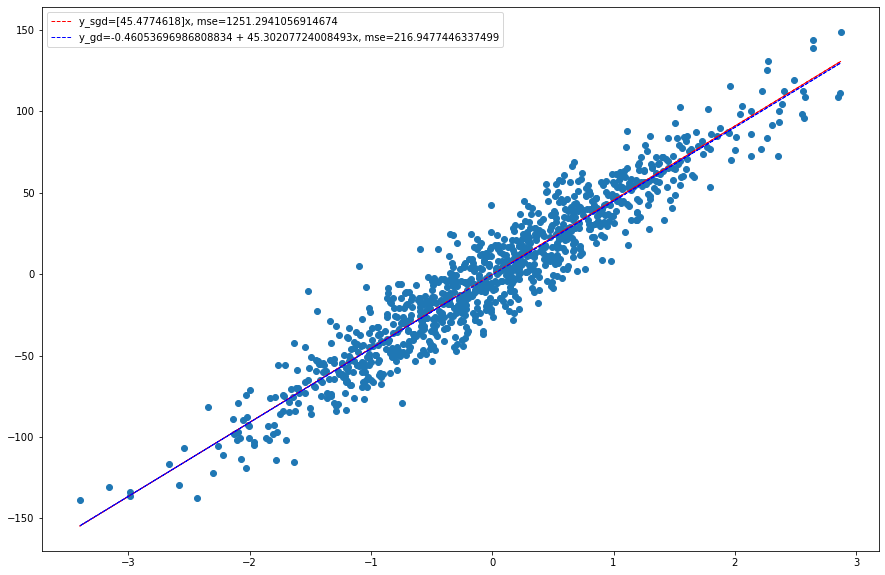

In [71]:
# Построим графики найденных значений
plot_graf()
print(f'Коэффициент регуляризации: {k_reg}')

Без L2-регуляризации: 
- $err_{max\_iter}$=217.19059867932847;
- W=[45.4774618];
- max_iter=100000.

C L2-регуляризацией:
- k_reg = 0.5  # коэффициент регуляризации;
- $err_{max\_iter}$=1251.2941056914674;
- W=[45.4774618];
- max_iter=100000.


В нашем случае, применение 𝐿2 -регуляризации не повлияло на результат. Метод продолжался пока не выполнилось условие выхода, а именно превышение максимального числа итераций (max_iter = 1e5), как и в первом случае.

